In [2]:
import riotwatcher as rt
import creds

conecct = rt.LolWatcher(creds.riot_API_key)
conecct

Extraer info champ

In [3]:
me = conecct.summoner
the_name = "Antthoss"
me = me.by_name(region = "la1",summoner_name=the_name)
me

{'id': 'lSxjo9PcLdqfX0xNdRtqCqsJs-wluUYc81ZQgZ1zz1LHzEaaQvJ_vDD2zA',
 'accountId': 'ISVeKqcd5Vqevl6nzh_jdqnWoTSghH4OVu4z1hwgZz-EVfeQ6E9DH5Dt',
 'puuid': '_ROPUnorv3aVovk2pvxxKOpkipZxHUZJH-yOToXlJLZ7397Ubg0R_NJS3H4rG_RjgpidV1dVBkveOA',
 'name': 'Antthoss',
 'profileIconId': 3622,
 'revisionDate': 1666583792000,
 'summonerLevel': 67}

In [4]:
match = conecct.match

In [5]:
list_matches = match.matchlist_by_puuid(region="la1",puuid=me["puuid"],count=100)

In [6]:
partida_prueba = match.by_id(region="la1",match_id=list_matches[2])

In [7]:
partida_prueba["info"]["participants"][0]["summonerName"]
for name in partida_prueba["info"]["participants"]:
    if(name["summonerName"] == the_name):
        me = name
danio = me["totalDamageDealt"]
champ = me["championName"]

In [8]:
list_danio = []
list_champs = []
dic_danio = {}

for partida in list_matches:
    partida_id = match.by_id(region="la1",match_id=partida)
    for name in partida_id["info"]["participants"]:
        lista_campeones = dic_danio.keys()
        if(name["summonerName"] == the_name):
            me = name
    if(me["championName"] in lista_campeones):
        danio = dic_danio[me["championName"]] + me["totalDamageDealtToChampions"]
        temp_dic = {me["championName"]:danio}
    else:
        temp_dic = {me["championName"]:me["totalDamageDealtToChampions"]}
    dic_danio.update(temp_dic)

In [9]:
partida_id["info"]["participants"]

[{'assists': 20,
  'baronKills': 0,
  'basicPings': 48,
  'bountyLevel': 3,
  'challenges': {'12AssistStreakCount': 0,
   'abilityUses': 295,
   'acesBefore15Minutes': 0,
   'alliedJungleMonsterKills': 0,
   'baronBuffGoldAdvantageOverThreshold': 1,
   'baronTakedowns': 0,
   'blastConeOppositeOpponentCount': 0,
   'bountyGold': 600,
   'buffsStolen': 0,
   'completeSupportQuestInTime': 0,
   'controlWardTimeCoverageInRiverOrEnemyHalf': 0.14993279918357186,
   'controlWardsPlaced': 3,
   'damagePerMinute': 801.9760398532693,
   'damageTakenOnTeamPercentage': 0.2609489406143617,
   'dancedWithRiftHerald': 0,
   'deathsByEnemyChamps': 7,
   'dodgeSkillShotsSmallWindow': 0,
   'doubleAces': 0,
   'dragonTakedowns': 0,
   'earliestBaron': 2187.9524544,
   'earlyLaningPhaseGoldExpAdvantage': 0,
   'effectiveHealAndShielding': 0,
   'elderDragonKillsWithOpposingSoul': 0,
   'elderDragonMultikills': 0,
   'enemyChampionImmobilizations': 29,
   'enemyJungleMonsterKills': 0,
   'epicMonsterKill

In [10]:
dic_danio

{'Elise': 99477,
 'Rammus': 8365,
 'Amumu': 29832,
 'Nocturne': 27850,
 'Viego': 323786,
 'Gragas': 8172,
 'FiddleSticks': 8387,
 'Kayn': 32050,
 'JarvanIV': 72258,
 'Thresh': 26388,
 'Irelia': 20203,
 'Soraka': 22641,
 'Sejuani': 36871,
 'Graves': 120948,
 'Alistar': 45071,
 'Poppy': 53042,
 'Vi': 36650,
 'Hecarim': 67893,
 'Maokai': 113542,
 'Olaf': 22436,
 'Ornn': 9275,
 'Aatrox': 6630,
 'Udyr': 7915,
 'Trundle': 9452}

##### Obtener el daño de las 20 partidas

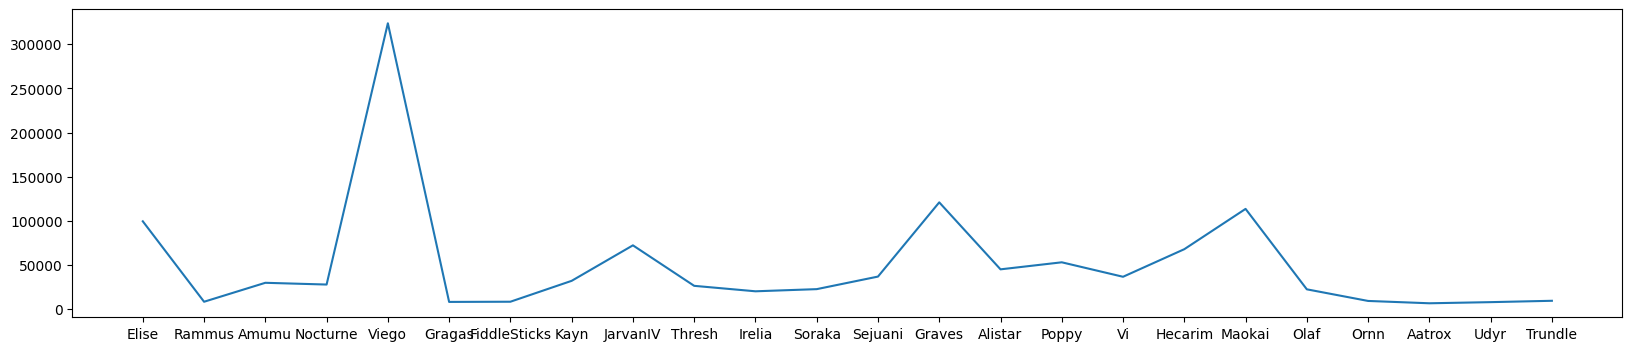

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.plot(dic_danio.keys(),dic_danio.values())
plt.show()